In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go


#### Theoretical Loss Function Curve

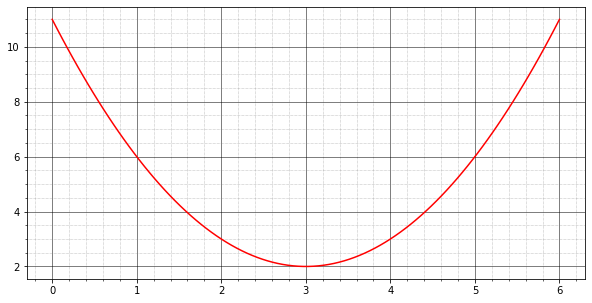

In [10]:
X = np.linspace(0, 6, 100)

y = (X - 3)**2 + 2

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="black")
ax.grid(which="minor", linestyle=":", linewidth="0.5", color="grey")
plt.plot(X, y, "red")
plt.show()


#### Dataset creation

In [11]:
nominal_period = 75
array_1_base = 100
array_2_base = 200
array_3_base = 150
array_4_base = 50
variance_rate = 8
transit_period = 15
transit_ampli = 4

array_1 = np.random.randint(array_1_base, array_1_base + variance_rate, nominal_period)

array_1_2 = np.linspace(array_1_base - variance_rate * 2, array_2_base, transit_period) \
           + np.random.randint(- variance_rate * transit_ampli, variance_rate * transit_ampli, transit_period)

array_2 = np.random.randint(array_2_base, array_2_base + variance_rate, nominal_period)

array_2_3 = np.linspace(array_2_base - variance_rate * 2, array_3_base, transit_period) \
           + np.random.randint(- variance_rate * transit_ampli, variance_rate * transit_ampli, transit_period)
array_3 = np.random.randint(array_3_base, array_3_base + variance_rate, nominal_period)

array_3_4 = np.linspace(array_3_base-variance_rate * 2, array_4_base, transit_period) \
           + np.random.randint(- variance_rate * transit_ampli, variance_rate * transit_ampli, transit_period)
array_4 = np.random.randint(array_4_base, array_4_base + variance_rate, nominal_period)

process = np.concatenate((
    array_1,
    array_1_2,
    array_2,
    array_2_3,
    array_3,
    array_3_4,
    array_4,
    ))

#### Dataset processing

In [12]:
process_grad = np.gradient(process)

df = pd.DataFrame(data=process, columns=["process"])
df["process_roll"] = df["process"].rolling(20, center=True).mean()

df["process_grad"] = np.gradient(df["process_roll"].to_numpy())
#df["process_grad"] = df["process_grad"].rolling(10, center=True).mean()

df["variation"] = np.zeros(len(df))
df["variation"][abs(df["process_grad"]) > 1] = 250
df["variation"].rolling(10, center=True).mean()

df[20:-20]

,process,process_roll,process_grad,variation
20,107.0,104.30,0.175,0.0
21,105.0,104.35,0.075,0.0
22,102.0,104.45,0.125,0.0
23,104.0,104.60,-0.075,0.0
24,107.0,104.30,-0.150,0.0
...,...,...,...,...
320,52.0,53.95,0.025,0.0
321,55.0,54.30,0.175,0.0
322,57.0,54.30,0.025,0.0
323,57.0,54.35,0.025,0.0


#### Visualization

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=df["process"], mode="lines", name="process"))
fig.add_trace(go.Scatter(y=df["process_roll"], mode="lines", name="process_roll"))
fig.add_trace(go.Scatter(y=df["process_grad"], mode="lines", name="process_grad"))
fig.add_trace(go.Scatter(y=df["variation"], mode="lines", fill="tozerox", line_color="red", name="to_remove"))

fig.update_yaxes(range=[min(df["process_grad"])-10, max(df["process"])+10])
fig.update_layout(autosize=False, width=1400, height=600)
fig.show()
